# Mid Term Assessment: Development

Code used to develop datasets.

PHYS60022 for BSc, 

See for [cluster example code](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py) which shows several artifical dataset creation routines and several different methods.  



In [1]:
# Basic imports
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
import os
import numpy as np

output_directory = "/DATA/DSML/output"
plot_ext_list =[".pdf",".png"]

# Later the MSci data may need shuffling, or maybe not
shuffleOn=True

#From Color Universal Design (CUD): https://jfly.uni-koeln.de/color/
Okabe_Ito = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

In [2]:
from sklearn.datasets import make_moons

n_samples = 300
noise = 0.25
seed = 24 # Use year?

X, label = make_moons(n_samples = n_samples, noise = noise, random_state = seed)
print (X.shape)
print (label.shape, label[0:9])

(300, 2)
(300,) [1 0 0 1 0 1 1 0 0]


In [3]:
# output file
filenamestem = "PHYS60022_2m"
attribute_string = "_n{0:04d}_r{1:04d}_s{2:03d}".format(n_samples,int(0.5+1000*noise),seed)
fullfilename = os.path.join(output_directory,filenamestem+attribute_string+".npy")
print("* Writing two moons data to "+fullfilename)
with open(fullfilename, 'wb') as fp:
    np.save(fp, X)
    np.save(fp, label)
print("* Finished two moons writing data to "+fullfilename)

plotfilename = os.path.join(output_directory,filenamestem+attribute_string)
for ext in plot_ext_list:
    print("* Plot of two moons data saved to "+plotfilename)
    plt.savefig(plotfilename+ext)


* Writing two moons data to /DATA/DSML/output\PHYS60022_2m_n0300_r0250_s024.npy
* Finished two moons writing data to /DATA/DSML/output\PHYS60022_2m_n0300_r0250_s024.npy
* Plot of two moons data saved to /DATA/DSML/output\PHYS60022_2m_n0300_r0250_s024
* Plot of two moons data saved to /DATA/DSML/output\PHYS60022_2m_n0300_r0250_s024


<Figure size 432x288 with 0 Axes>

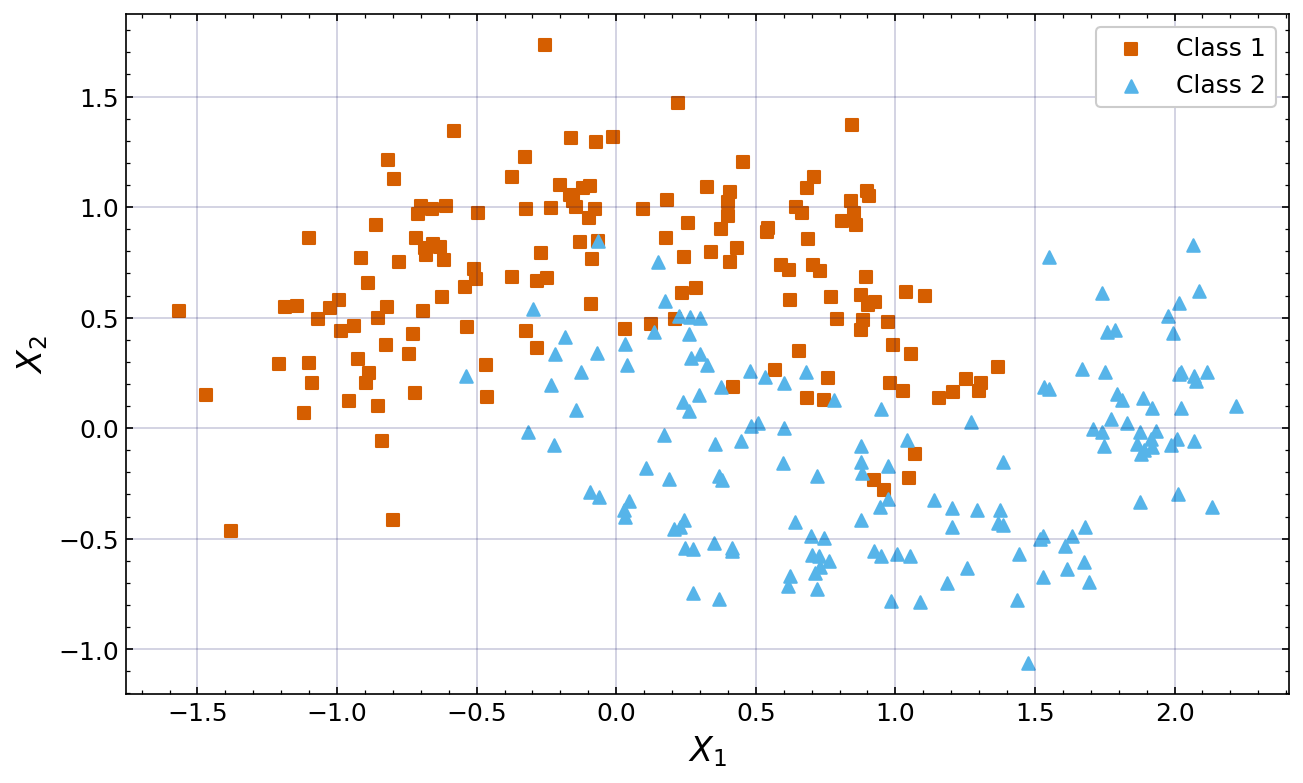

In [4]:
# Show data

fig, ax = plt.subplots(1,1,figsize = (10,6),dpi = 150)
ax.scatter(X[:,0][label==0],X[:,1][label==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1)
ax.scatter(X[:,0][label==1],X[:,1][label==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.legend(loc='upper right',fontsize = 12,framealpha = 1)

In [5]:
# Add gaussian blob for MSci
from scipy.stats import norm
n_blob=int(0.1+n_samples/2)
Xblob = norm.rvs(loc=0, scale=noise, size=2*n_blob).reshape((n_blob,2))
blob_centre_x1 = 1.5
blob_centre_x2 = 1.0
Xblob[:,0]+=blob_centre_x1
Xblob[:,1]+=blob_centre_x2
print(Xblob.shape)
Xblob[0:9,:]

(150, 2)


array([[1.61789923, 1.11800009],
       [1.33903125, 1.02835342],
       [1.06876611, 0.92265713],
       [1.24517567, 1.00808938],
       [1.76747297, 0.91046741],
       [1.55323677, 1.03108383],
       [1.60818766, 1.02170975],
       [1.71066782, 1.65282936],
       [1.28693996, 0.83913734]])

In [6]:
Xplus = np.concatenate( (X, Xblob), axis=0)
labelplus = np.concatenate( (label, np.full((n_blob), 2)), axis=0)
print(Xplus.shape, labelplus.shape)

(450, 2) (450,)


In [7]:
# Shuffle use same seed as above, why not?
# Needs data frame with floats and integer arrays to be shuffled in same way

if shuffleOn:
    print("Shuffling the two numpy arrays with coordinates (floats) and labels (integers)")
    rng = np.random.default_rng(seed)
    position = np.array(range(Xplus.shape[0]))
    rng.shuffle(position)
    print(position[0:9])
    # Surely a better way to shuffle two distinct arrays, dataframe better here?
    for i in range(Xplus.shape[0]):
        xxx=Xplus[i,0]
        yyy=Xplus[i,1]
        lll=labelplus[i]
        rrr=position[i]
        Xplus[i,0]=Xplus[rrr,0]
        Xplus[i,1]=Xplus[rrr,1]
        labelplus[i]=labelplus[rrr]
        Xplus[rrr,0]=xxx
        Xplus[rrr,1]=yyy
        labelplus[rrr]=lll
    

Shuffling the two numpy arrays with coordinates (floats) and labels (integers)
[444 179 426 186 224 316 381 168  12]


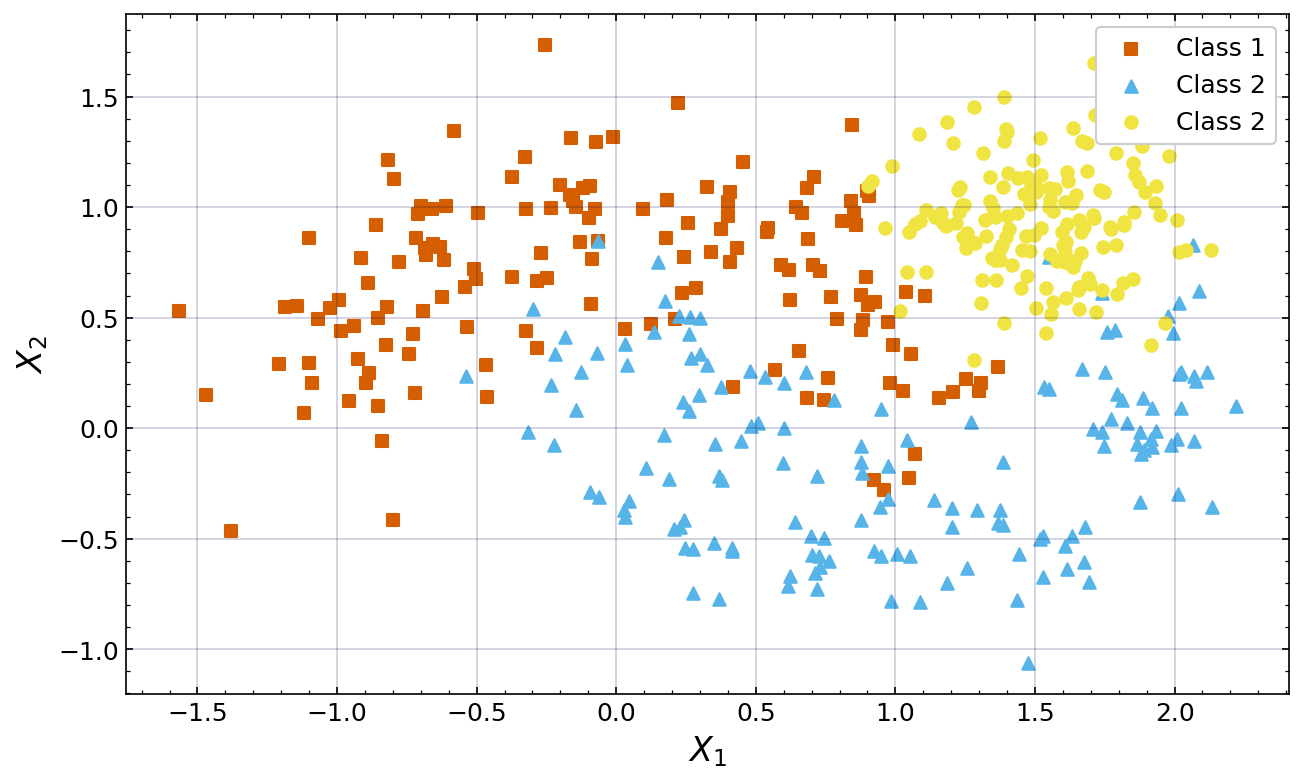

In [8]:
# Show data

fig, ax = plt.subplots(1,1,figsize = (10,6),dpi = 150)
ax.scatter(Xplus[:,0][labelplus==0],Xplus[:,1][labelplus==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1)
ax.scatter(Xplus[:,0][labelplus==1],Xplus[:,1][labelplus==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1)
ax.scatter(Xplus[:,0][labelplus==2],Xplus[:,1][labelplus==2],color='#F0E442',marker='o',label='Class 2',zorder = 1)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.legend(loc='upper right',fontsize = 12,framealpha = 1)

In [9]:
# output file
filenamestem = "PHYS70073_2mb"
#attribute_string = "_n{0:04d}_r{1:04d}_s{2:03d}".format(n_samples,int(0.5+1000*noise),seed)
fullfilename2mb = os.path.join(output_directory,filenamestem+attribute_string+".npy")
print("* Writing two moons and blob data to "+fullfilename2mb)
with open(fullfilename2mb, 'wb') as fp:
    np.save(fp, Xplus)
    np.save(fp, labelplus)
print("* Finished two moons and blob writing data to "+fullfilename2mb)

plotfilename2mb = os.path.join(output_directory,filenamestem+attribute_string)
for ext in plot_ext_list:
    print("* Plot of moons and blob data saved to "+plotfilename2mb)
    plt.savefig(plotfilename2mb+ext)


* Writing two moons and blob data to /DATA/DSML/output\PHYS70073_2mb_n0300_r0250_s024.npy
* Finished two moons and blob writing data to /DATA/DSML/output\PHYS70073_2mb_n0300_r0250_s024.npy
* Plot of moons and blob data saved to /DATA/DSML/output\PHYS70073_2mb_n0300_r0250_s024
* Plot of moons and blob data saved to /DATA/DSML/output\PHYS70073_2mb_n0300_r0250_s024


<Figure size 432x288 with 0 Axes>

Now test reading the data

* Reading data from /DATA/DSML/output\PHYS60022_2m_n0300_r0250_s024.npy
* Finished reading data from /DATA/DSML/output\PHYS60022_2m_n0300_r0250_s024.npy


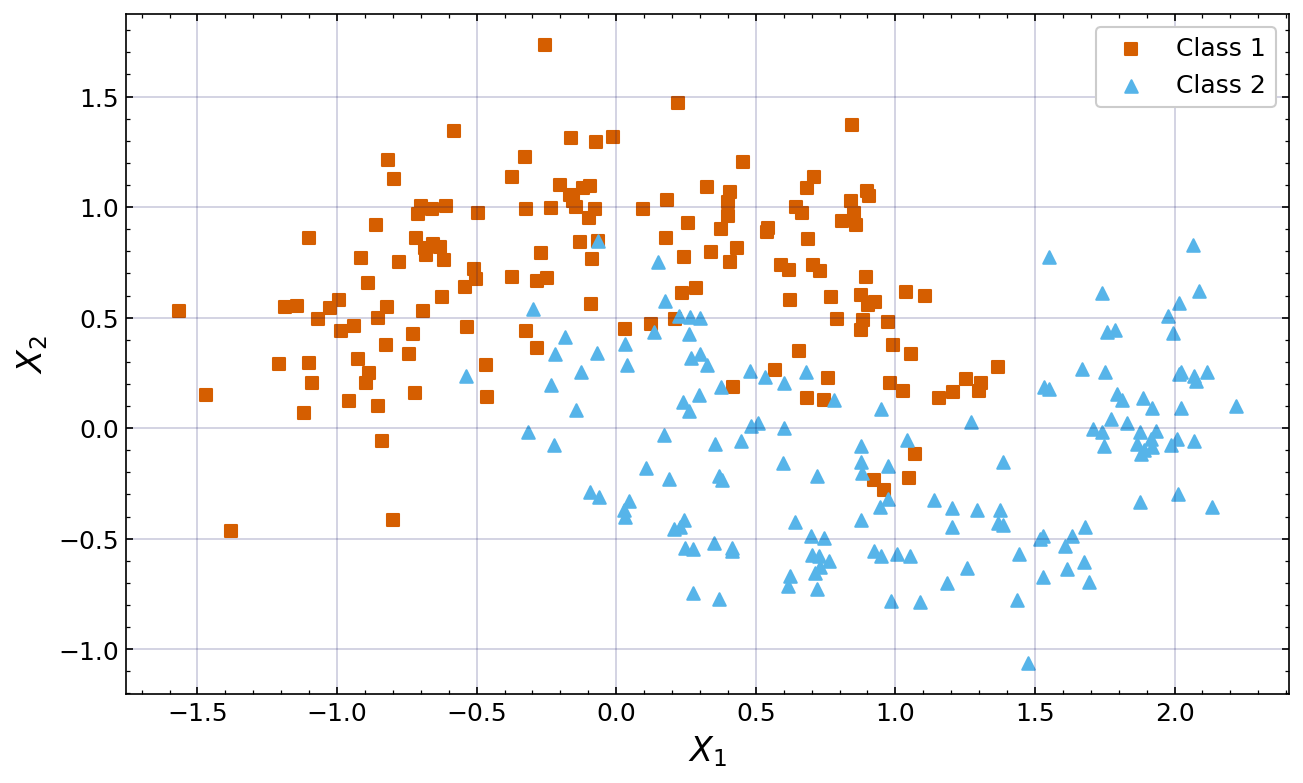

In [10]:
# input BSc PHYS600023 file
print("* Reading data from "+fullfilename)
with open(fullfilename, 'rb') as ifp:
    X6 = np.load(ifp)
    label6 = np.load(ifp)
print("* Finished reading data from "+fullfilename)
# Show data
fig, ax = plt.subplots(1,1,figsize = (10,6),dpi = 150)
ax.scatter(X6[:,0][label6==0],X6[:,1][label6==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1)
ax.scatter(X6[:,0][label6==1],X6[:,1][label6==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.legend(loc='upper right',fontsize = 12,framealpha = 1)

* Reading data from /DATA/DSML/output\PHYS70073_2mb_n0300_r0250_s024.npy
* Finished reading data from /DATA/DSML/output\PHYS70073_2mb_n0300_r0250_s024.npy


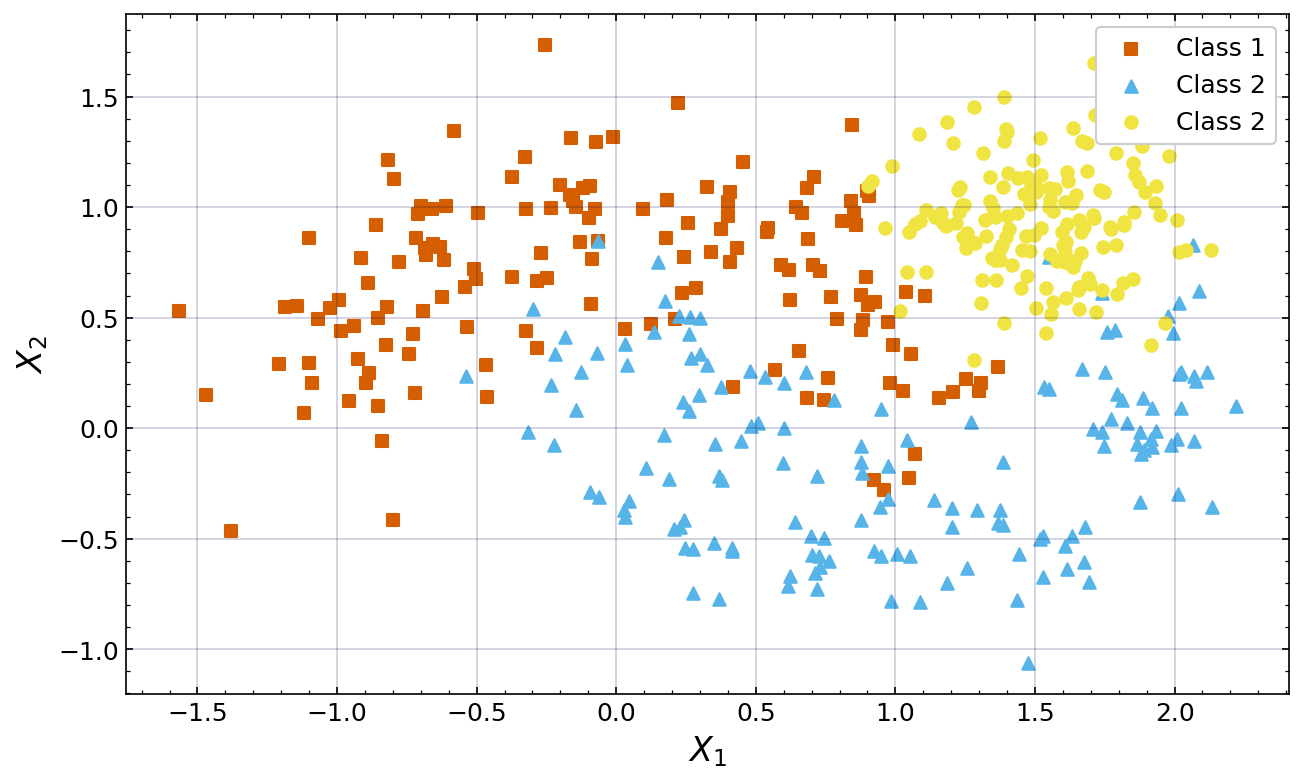

In [11]:
# input file for MSci PHYS70073
print("* Reading data from "+fullfilename2mb)
with open(fullfilename2mb, 'rb') as ifp:
    X7 = np.load(ifp)
    label7 = np.load(ifp)
print("* Finished reading data from "+fullfilename2mb)
# Show data
fig, ax = plt.subplots(1,1,figsize = (10,6),dpi = 150)
ax.scatter(X7[:,0][label7==0],X7[:,1][label7==0],color='#D55E00',marker='s',label= 'Class 1',zorder = 1)
ax.scatter(X7[:,0][label7==1],X7[:,1][label7==1],color='#56B4E9',marker='^',label='Class 2',zorder = 1)
ax.scatter(X7[:,0][label7==2],X7[:,1][label7==2],color='#F0E442',marker='o',label='Class 2',zorder = 1)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',labelsize= 12,direction='in',top=True,right=True)
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.legend(loc='upper right',fontsize = 12,framealpha = 1)

In [12]:
print("*** Finished ***")

*** Finished ***
